Mounted at /content/drive
Python 3.10.12
[9, 3]
[9, 2]
[9, 1]
[11, 4]
[10, 4]
[10, 5]
[1, 7]
[1, 6]
[1, 5]
[1, 4]
[1, 3]
[1, 2]
[2, 2]
[5, 0]
[7, 0]
marker error


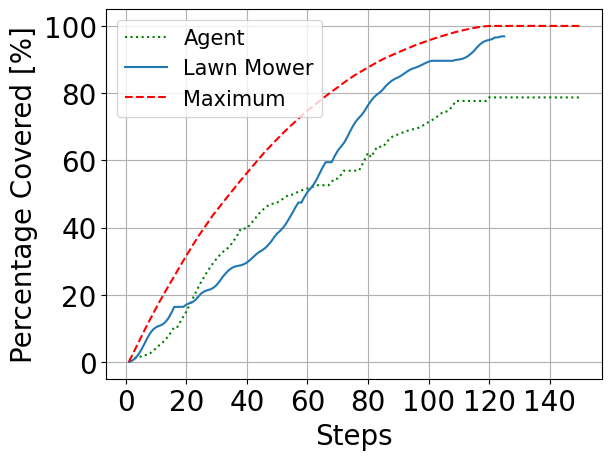

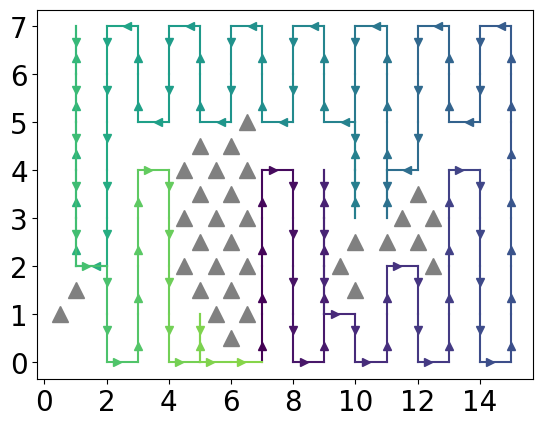

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
#file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
#!pip install pybullet
#!pip install gymnasium
#!pip install urdfpy

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

def prob(upper, lower):
    cdf_upper_limit = norm(loc = 0 , scale = 1).cdf(upper)
    cdf_lower_limit = norm(loc = 0 , scale = 1).cdf(lower)

    p = cdf_upper_limit - cdf_lower_limit
    return p

def probability_grid(x, y, sigmas_covered):
    arr = np.zeros((x, y))#the plus one is to pad the array with zeros
    sum=0
    for i in range(x):
        for j in range(y):
            u_x = -sigmas_covered+(2*(sigmas_covered)/x)*(i+1)
            l_x = -sigmas_covered+(2*(sigmas_covered)/x)*(i)
            prob_x = prob(u_x, l_x)

            u_y = -sigmas_covered+(2*(sigmas_covered)/y)*(j+1)
            l_y = -sigmas_covered+(2*(sigmas_covered)/y)*(j)
            prob_y = prob(u_y, l_y)

            p_box = prob_x*prob_y
            sum = sum + p_box
            arr[i, j] = p_box
    return arr, sum

global g
g, sum=probability_grid(19, 10, 2)

path_coords=([[7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [8, 4], [8, 3], [8, 2], [8, 1], [8, 0], [9, 0],
 [9, 1], [9, 2], [9, 3], [9, 4], [9, 3], [9, 2], [9, 1], [10, 1], [10, 0], [11, 0], [11, 1], [11, 2], [12, 2],
  [12, 1], [12, 0], [13, 0], [13, 1], [13, 2], [13, 3], [13, 4], [14, 4], [14, 3], [14, 2], [14, 1], [14, 0],
   [15, 0], [15, 1], [15, 2], [15, 3], [15, 4], [15, 5], [15, 6], [15, 7], [14, 7], [14, 6],
    [14, 5], [13, 5], [13, 6], [13, 7], [12, 7], [12, 6], [12, 5], [12, 4], [11, 4], [11, 3],
     [11, 4], [11, 5], [11, 6], [11, 7], [10, 7], [10, 6], [10, 5], [10, 4], [10, 3],
      [10, 4], [10, 5], [9, 5], [9, 6], [9, 7], [8, 7], [8, 6], [8, 5], [7, 5], [7, 6], [7, 7],
        [6, 7], [6, 6], [6, 5], [5, 5], [5, 6], [5, 7], [4, 7], [4, 6], [4, 5],
        [3, 5], [3, 6], [3, 7], [2, 7], [2, 6], [2, 5], [2, 4], [2, 3], [2, 2], [1, 2], [1, 3],
         [1, 4], [1, 5], [1, 6], [1, 7], [1, 7], [1, 6], [1, 5], [1, 4], [1, 3], [1, 2], [2, 2],
          [2, 1], [2, 0], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [4, 4], [4, 3],
               [4, 2], [4, 1], [4, 0], [5, 0], [5, 1], [5, 0], [6, 0], [7, 0]])

continuous_coord_x=[]
continuous_coord_y=[]

for i in range(len(path_coords)):

  continuous_coord_x=np.concatenate((continuous_coord_x, [path_coords[i][0]]))
  continuous_coord_y=np.concatenate((continuous_coord_y, [path_coords[i][1]]))


mr=0.7064
local_reward_plot=[0]

Reward=0

for i in path_coords:

  reward=g[int(i[0]), int(i[1])]
  if reward==0:
    print(i)
  g[int(i[0]), int(i[1])]=0
  Reward=Reward+reward
  local_reward_plot = np.concatenate((local_reward_plot, [Reward/mr]))



fs=20

data = pd.read_csv('/content/drive/My Drive/ColabNotebooks/5qlearning/max_theoretical.csv')
data2 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/5qlearning/moved_reward_sameq/south.csv')

f=plt.figure(1)
plt.plot(range(1, 151, 1), data2[0:150]/100, color='green', linestyle='dotted')
plt.plot(range(1, len(local_reward_plot)+1, 1), local_reward_plot*100)
plt.plot(np.linspace(1, 150, 151), data.iloc[0], 'r--')

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel("Steps", fontsize=fs)
plt.ylabel("Percentage Covered [%]", fontsize=fs)
plt.legend(["Agent", "Lawn Mower", "Maximum"], fontsize=15, loc='upper left' )
plt.grid()

f.show()



import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

h=plt.figure(2)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

viridis = mpl.colormaps['viridis'].resampled(150)
newcolors = viridis(np.linspace(0, 1, 150))

for i in range(len(continuous_coord_x)-1):

  plt.plot(continuous_coord_x[i: i+2], continuous_coord_y[i: i+2], color=newcolors[i])
  xarrow=(2*continuous_coord_x[i]+continuous_coord_x[i+1])/3
  yarrow=(2*continuous_coord_y[i]+continuous_coord_y[i+1])/3

  dx=-continuous_coord_x[i]+continuous_coord_x[i+1]
  dy=-continuous_coord_y[i]+continuous_coord_y[i+1]



  if dx>0:
    m='>'
  elif dx<0:
    m='<'
  elif dy>0:
    m='^'
  elif dy<0:
    m='v'
  else:
    m=0

  if m==0:
    print("marker error")
  else:
    plt.plot(xarrow, yarrow, color=newcolors[i], marker=m)

#coords_excluded=[(1, 1), (1, 2), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (4, 7), (5, 7), (2, 12), (4, 12)]
coords_excluded=[(1.5, 1), (2, 1.5), (5.5, 2), (5.5, 3), (5.5, 4), (6, 1.5), (6, 2.5), (6, 3.5), (6, 4.5), (6.5, 1), (6.5, 2), (6.5, 3), (6.5, 4), (7, 0.5), (7, 1.5), (7, 2.5), (7, 3.5), (7, 4.5), (7.5, 1), (7.5, 2), (7.5, 4), (7.5, 5), (7.5, 3), (10.5, 2), (11, 1.5), (11, 2.5), (12, 2.5), (12.5, 3), (13, 2.5), (13, 3.5), (13.5, 2), (13.5, 3)]

for i in coords_excluded:
  plt.plot(i[0]-1,i[1],  marker='^', color='gray', markersize=12)

#print(continuous_coord_x)
#plt.plot(continuous_coord_x[0:130], continuous_coord_y[0:130])
h.show()